In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [179]:
data = {
    "tumour_size": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "malingnent": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.to_csv("tumour.csv", index=False)
df.head()

,tumour_size,malingnent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


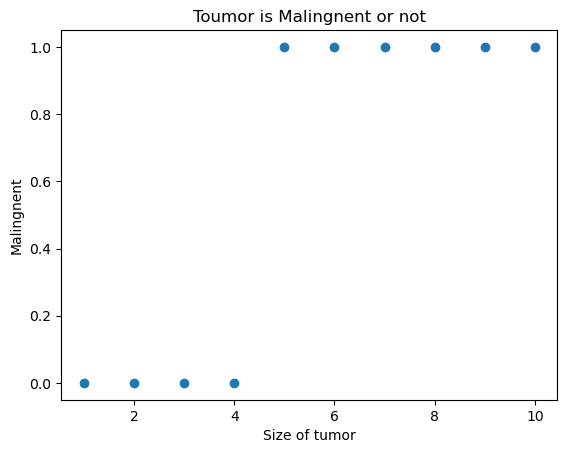

In [180]:
X=df["tumour_size"].values
Y= df["malingnent"].values
plt.scatter(X,Y)
plt.xlabel("Size of tumor")
plt.ylabel("Malingnent")
plt.title("Toumor is Malingnent or not")
plt.show()

In [181]:
X = df["tumour_size"].values.reshape(-1, 1)
y = df["malingnent"].values
X = np.c_[np.ones(X.shape[0]), X]
X_train, X_test = X[:8], X[8:]
Y_train, Y_test = Y[:8], Y[8:]
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 8
Testing set size: 2


In [182]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
print(sigmoid(0))

0.5


In [183]:
def compute_cost(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)  
    predictions = sigmoid(z)
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost
weights = np.zeros(X_train.shape[1])
cost = compute_cost(X_train, Y_train, weights)
print("Cost:",cost)

Cost: 0.6931471805599453


In [184]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    
    for i in range(iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        if i % 100 == 0:
            cost = compute_cost(X, y, weights)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return weights
learning_rate = 0.1
iterations = 1000
weights = gradient_descent(X, y, np.zeros(X.shape[1]), learning_rate, iterations)

print("Final Weights:", weights)


Iteration 0, Cost: 0.5247
Iteration 100, Cost: 0.3500
Iteration 200, Cost: 0.2712
Iteration 300, Cost: 0.2275
Iteration 400, Cost: 0.1997
Iteration 500, Cost: 0.1803
Iteration 600, Cost: 0.1658
Iteration 700, Cost: 0.1546
Iteration 800, Cost: 0.1455
Iteration 900, Cost: 0.1379
Final Weights: [-5.23006261  1.22918733]


In [190]:
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= 0.5).astype(int)
y_pred = predict(X_test, weights)
print(y_test)
print(y_pred)

[1 1 0 ... 0 0 0]
[1 1]


ValueError: x and y must be the same size

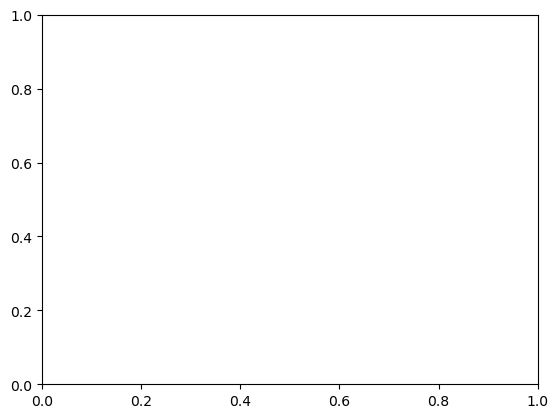

In [195]:
X_range = np.linspace(0, 12, 100).reshape(-1, 1)
X_range_bias = np.c_[np.ones(X_range.shape[0]), X_range]
y_prob = sigmoid(np.dot(X_range_bias, weights))

plt.scatter(X_train[:8, 1], y_train)
plt.scatter(X_test[:8, 1], y_test)

plt.plot(X_range, y_prob, color='red', label="Logistic Regression Curve")

plt.xlabel("size")
plt.ylabel("malingnent")
plt.title("malingnent or not")

plt.legend()
plt.show()


In [ ]:
df=pd.read_csv('class.csv')
df.head()

In [ ]:
df=pd.read_csv('class.csv')
X = df["F1"].values 
X1 = df["F2"].values
y = df["Class"].values
print(len(X))
print( len(X1))

In [ ]:
plt.scatter(X,X1,y)


In [ ]:
plt.scatter(X,X1)

In [ ]:
x = df["F1"].values.reshape(-1, 1)
y = df["F1"].values.reshape(-1, 1)
z = df["Class"].values
x = np.c_[np.ones(x.shape[0]), x]
y = np.c_[np.ones(y.shape[0]), y]
x_train = x[:2000]
y_train= y[:2000]
z_train= z[:2000]
print(len(x_train))
print(len(y_train))
print(len(z_train))

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
print(sigmoid(0))

In [ ]:
def compute_cost(x, y, z, w1,w2):
    m = len(y)
    w = np.dot(x, w1) + np.dot(y, w2) 
    predictions = sigmoid(w)
    cost = (-1/m) * np.sum(z* np.log(predictions) + (1 - z) * np.log(1 - predictions))
    return cost
w1 = np.zeros(x_train.shape[1])
w2 = np.zeros(y_train.shape[1])
cost = compute_cost(x_train, y_train,z_train, w1,w2)
print(cost)

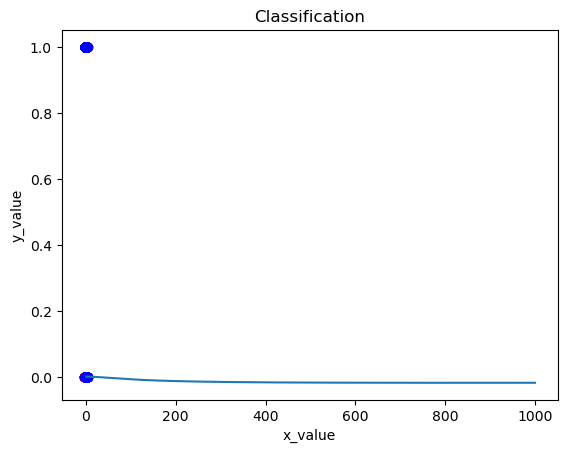

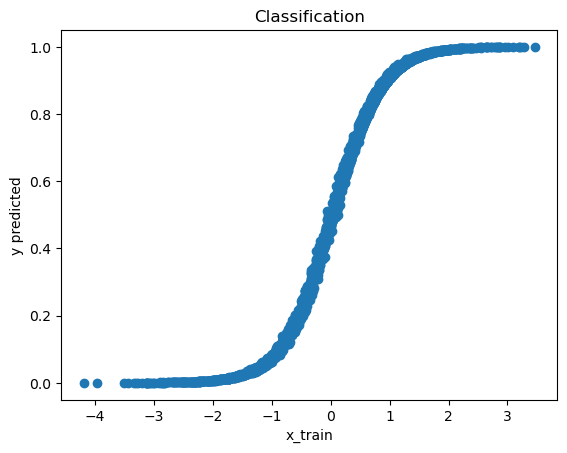

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#read csv file 
df=pd.read_csv("class.csv",nrows=1900)#extract training data
x1_train=df['F1']
x2_train=df['F2']
y_train=df['Class']
#ploting data point
fig,p=plt.subplots()
p.set_title("Classification")
p.set_xlabel("x_value")
p.set_ylabel("y_value")
p.scatter(x1_train,y_train,color='red')
p.scatter(x2_train,y_train,color='blue')#combine both feature to single feature
x_train=np.column_stack((x1_train,x2_train))
m,f=np.shape(x_train)
#define f(x) function
def f_x(x,w,b):
    z=np.dot(x,w)+b
    f=1/(1+np.exp(-z))
    return f
#define cost function
def cost(x,y,w,b):
    l=y*np.log(f_x(x,w,b))-(1-y)*np.log(1-f_x(x,w,b))
    lc=-1/m*np.sum(l)
    return lc
#derivative wrt w
def derive_w(x,y,w,b):
    s=1/m*np.dot(x.T,(f_x(x,w,b)-y))
    return s
#derivative wrt b
def derive_b(x,y,w,b):
    s=1/m*(f_x(x,w,b)-y).sum()
    return s
#gradient descent implementation with a=0.03
w= np.random.randn(f) * 0.01
b=0
costs=[]
ite=[]
wa=[]
ba=[]
wa.append(w)
ba.append(b)
a=0.03
ct=cost(x_train,y_train,w,b)
costs.append(ct)
iterations=1000
i=1
ite.append(i)
while i<iterations:
    wd=derive_w(x_train,y_train,w,b)
    bd=derive_b(x_train,y_train,w,b)
    w=w-a*wd
    wa.append(w)
    b=b-a*bd
    ba.append(b)
    ct=cost(x_train,y_train,w,b)
    costs.append(ct)
    i=i+1
    ite.append(i)
it3=np.array(ite)
cp3=np.array(costs)
bs=np.array(ba)
#print(wa)
#iteration vs cost plot
plt.plot(it3,cp3)#final logistic regression model
y=f_x(x_train,w,b)
fig,p=plt.subplots()
p.set_title("Classification")
p.set_xlabel("x_train")
p.set_ylabel("y predicted")
p.scatter(x1_train,y)